In [1]:
import torch.utils.data as Data
import torchvision
import torch
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [6]:
def gaussian_noise(epsilon):
    transform_func = lambda x : (x + torch.randn_like(x)*epsilon)
    return torchvision.transforms.Lambda(transform_func)

cifar_stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

transform_train = torchvision.transforms.Compose([
#         torchvision.transforms.RandomCrop(32, padding=4),
#         torchvision.transforms.RandomRotation(degrees=10),
#         torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(*cifar_stats),
#         gaussian_noise(0.5),
])
trainset = torchvision.datasets.CIFAR10(root='../cifar10', train=True, transform=transform_train)

In [7]:
train_loader = Data.DataLoader(dataset=trainset, batch_size=1000, shuffle=False)
imgs, labels = next(iter(train_loader))

In [47]:
def show_image(img, ax=None, denormalize=True):
    if ax is None:
        _, ax = plt.subplots(figsize=(2,2))
    img = img.permute(1,2,0)
    if denormalize:
        means, stds = cifar_stats
        means = torch.tensor(means).reshape(1,1,3)
        stds = torch.tensor(stds).reshape(1,1,3)
        img = img * stds + means
    ax.imshow(img.clamp(0, 1))
    
def show_image_grid(imgs):
    n = 10
    _, axes = plt.subplots(n, n, figsize=(20, 20))
    indices = np.random.permutation(len(imgs))[:n*n].reshape(n,n)
    for i in range(n):
        for j in range(n):
            show_image(imgs[indices[i,j]], axes[i][j])
            
def normalize(img):
    return (img - img.mean())/img.std()

def show_natural_vs_normalized(img):
    _, axes = plt.subplots(1, 2, figsize=(5, 2))
    show_image(img, ax=axes[0], denormalize=False)
    show_image(normalize(img), ax=axes[1], denormalize=False)    

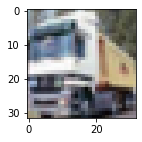

In [26]:
show_image(imgs[1], denormalize=True)

In [59]:
bottom_right_corner = imgs[1][:,22:27,22:27]
bottom_left_corner = imgs[1][:,20:,0:12]
top_right_corner = imgs[1][:,0:5,27:]

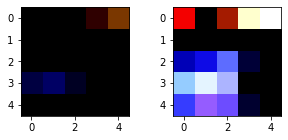

In [60]:
show_natural_vs_normalized(bottom_right_corner)

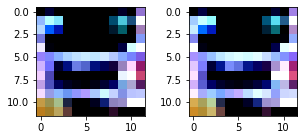

In [49]:
show_natural_vs_normalized(bottom_left_corner)

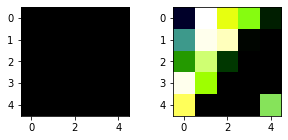

In [54]:
show_natural_vs_normalized(top_right_corner)